### Melanoma Detection - Problem Statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [77]:
# Importing required libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import MaxPool2D
from tensorflow.python.ops.gen_nn_ops import MaxPool

In [41]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train")
data_dir_test = pathlib.Path('CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [4]:
# Defining the parameters
batch_size = 32
img_height = 180
img_width = 180

In [5]:
# Importing the Train & Validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels="inferred",label_mode="categorical",batch_size=batch_size,image_size=(img_height,img_width),seed = 123,validation_split=0.2,subset="training")
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,labels="inferred",label_mode="categorical",batch_size=batch_size,image_size=(img_height,img_width),seed = 123,validation_split=0.2,subset="validation")

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [6]:
# List out all the classes of skin cancer and store them in a list.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


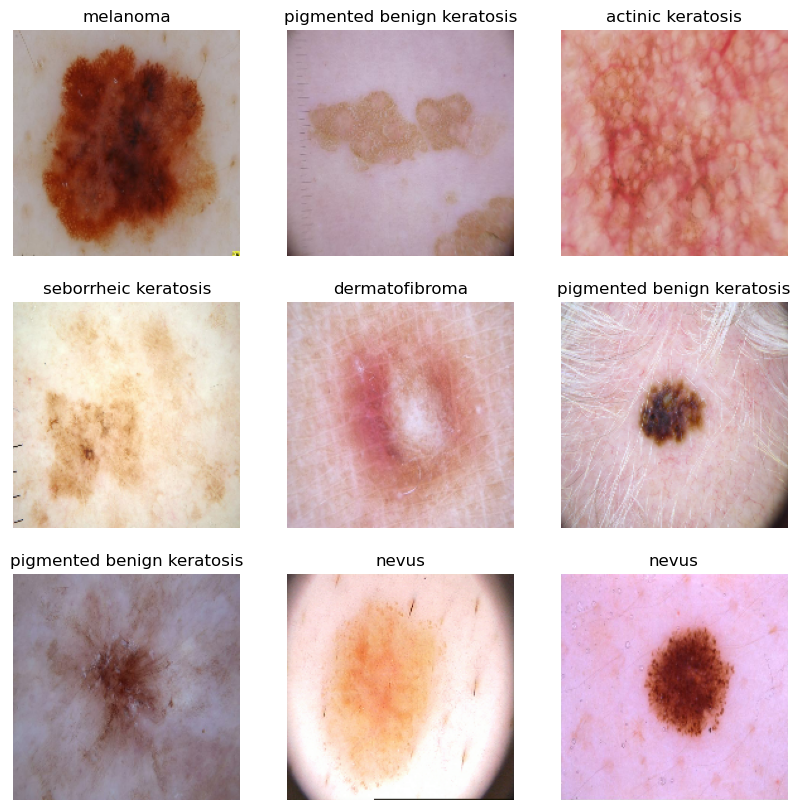

In [76]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):  # Take one batch of validation data
    for i in range(9):  # Assuming you want to display 9 images (adjust as needed)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

class name: vascular lesion


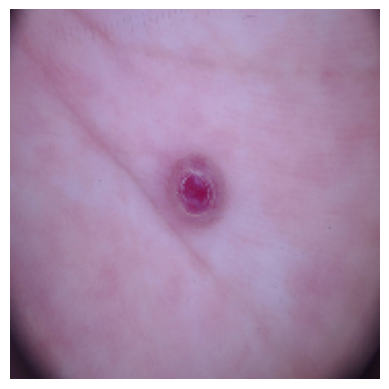

class name: nevus


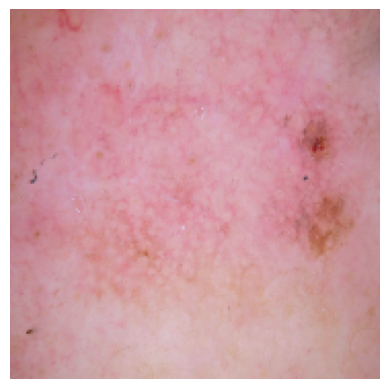

class name: pigmented benign keratosis


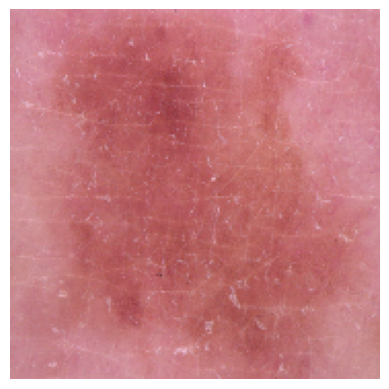

class name: melanoma


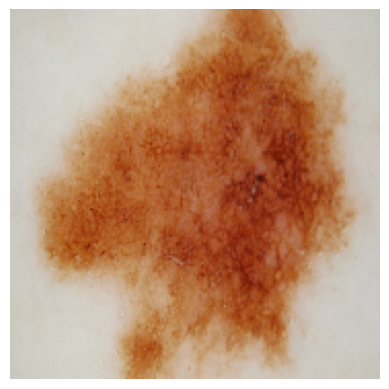

class name: dermatofibroma


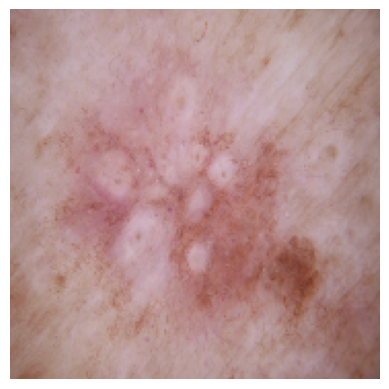

class name: actinic keratosis


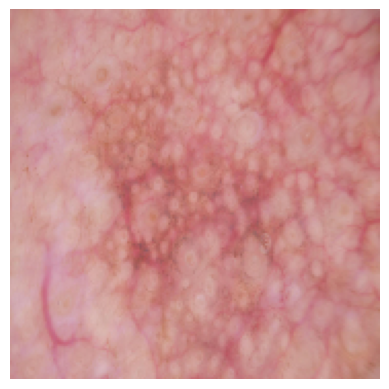

class name: basal cell carcinoma


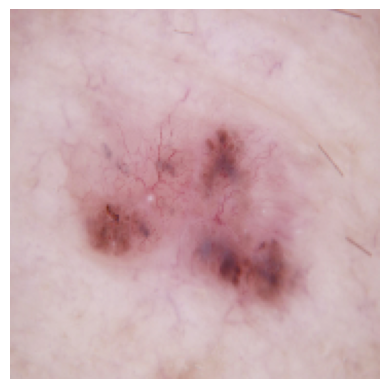

class name: squamous cell carcinoma


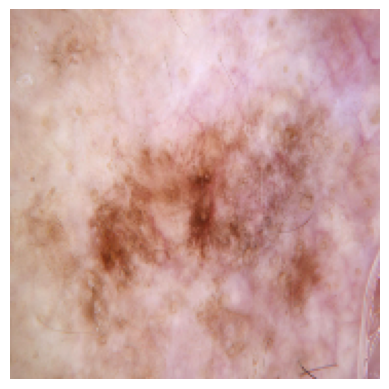

class name: seborrheic keratosis


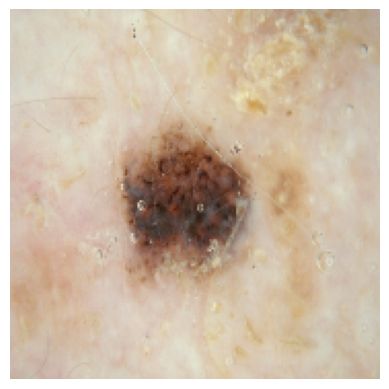

In [7]:
# ### Create a code to visualize one instance of all the nine classes present in the dataset
# import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

# class_check = {class_name:False for class_name in class_names}

# for images, labels in train_ds:
#   for image,label in zip(images,labels):
#     class_index = tf.argmax(label)
#     class_name = class_names[class_index]
#     if not class_check[class_name]:
#       print(f"class name: {class_name}")
#       # normalizing the image
#       plt.imshow(image/255.0)
#       plt.axis('off')
#       plt.show();
#       class_check[class_name]= True

#   if all(class_check.values()):
#     break

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the Model

In [18]:
# Create a Sequential model with Dropout layers
model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(9, activation='softmax')
])

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 32)       

In [14]:
# Train the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 60s 990ms/step - loss: 2.1316 - accuracy: 0.1903 - val_loss: 2.0544 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 63s 1s/step - loss: 2.0477 - accuracy: 0.2299 - val_loss: 1.9503 - val_accuracy: 0.2438
Epoch 3/20
56/56 [==============================] - 68s 1s/step - loss: 2.0094 - accuracy: 0.2433 - val_loss: 1.9054 - val_accuracy: 0.2931
Epoch 4/20
56/56 [==============================] - 73s 1s/step - loss: 1.9269 - accuracy: 0.3002 - val_loss: 1.8064 - val_accuracy: 0.3512
Epoch 5/20
56/56 [==============================] - 81s 1s/step - loss: 1.8646 - accuracy: 0.3125 - val_loss: 1.7636 - val_accuracy: 0.4743
Epoch 6/20
56/56 [==============================] - 85s 2s/step - loss: 1.7845 - accuracy: 0.3331 - val_loss: 1.7260 - val_accuracy: 0.3915
Epoch 7/20
56/56 [==============================] - 82s 1s/step - loss: 1.8267 - accuracy: 0.3309 - val_loss: 1.6604 - val_accuracy: 0.4720
Epoch 8/20
56/56 

### Visualizing training results

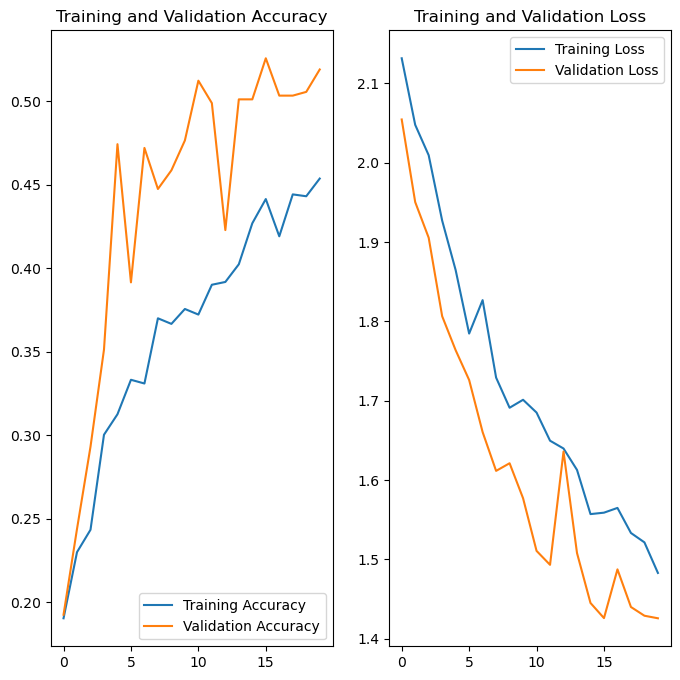

In [15]:
# Visualize the performance of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
- The model seems to look over fitting.
- To solev this we apply data augmentatoin technique to the images.

### Applying Data Augmentation

In [16]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    brightness_range=[0.5, 1.5],
    width_shift_range=0.2, 
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',validation_split=0.2)

(180, 180, 3)
1


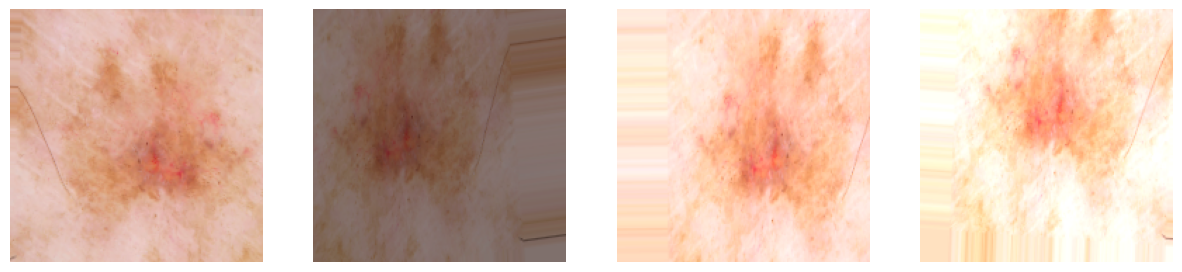

In [17]:
# visualize how your augmentation strategy works for one instance of training image.
for image,label in train_ds.take(1):
    original_image = image[0].numpy()
    print(original_image.shape)
    original_image = original_image.reshape((1,)+original_image.shape)
    data_itr = datagen.flow(original_image,batch_size=1)
    print(data_itr.batch_size)
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))
    for i in range(4):
        image_gen = next(data_itr)[0].astype('uint8')
        ax[i].imshow(image_gen)
        ax[i].axis('off')

In [19]:
# Create a Sequential model with Dropout layers
model_with_dropout = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),  # Add Dropout to the first Dense layer
    layers.Dense(9, activation='softmax')
])

In [20]:
# Compiling the model
model_with_dropout.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [21]:
#Train your model for 20 epochs
train_generator = datagen.flow_from_directory(data_dir_train,
                                              class_mode="categorical",
                                              batch_size=batch_size,
                                              target_size=(img_height,img_width),
                                              seed = 123,
                                              subset="training")


history = model_with_dropout.fit_generator(train_generator,validation_data=val_ds,epochs=epochs)

Found 1795 images belonging to 9 classes.
Epoch 1/20
57/57 [==============================] - 64s 1s/step - loss: 2.0963 - accuracy: 0.1799 - val_loss: 2.0304 - val_accuracy: 0.1857
Epoch 2/20
57/57 [==============================] - 95s 2s/step - loss: 2.0464 - accuracy: 0.2067 - val_loss: 2.0194 - val_accuracy: 0.2908
Epoch 3/20
57/57 [==============================] - 80s 1s/step - loss: 2.0137 - accuracy: 0.2390 - val_loss: 1.9196 - val_accuracy: 0.3311
Epoch 4/20
57/57 [==============================] - 78s 1s/step - loss: 1.9622 - accuracy: 0.2786 - val_loss: 1.8738 - val_accuracy: 0.3110
Epoch 5/20
57/57 [==============================] - 89s 2s/step - loss: 1.9291 - accuracy: 0.2713 - val_loss: 2.0255 - val_accuracy: 0.2506
Epoch 6/20
57/57 [==============================] - 103s 2s/step - loss: 1.9095 - accuracy: 0.2953 - val_loss: 1.7976 - val_accuracy: 0.3221
Epoch 7/20
57/57 [==============================] - 84s 1s/step - loss: 1.8520 - accuracy: 0.3092 - val_loss: 1.8287 

### Visualizing the training results

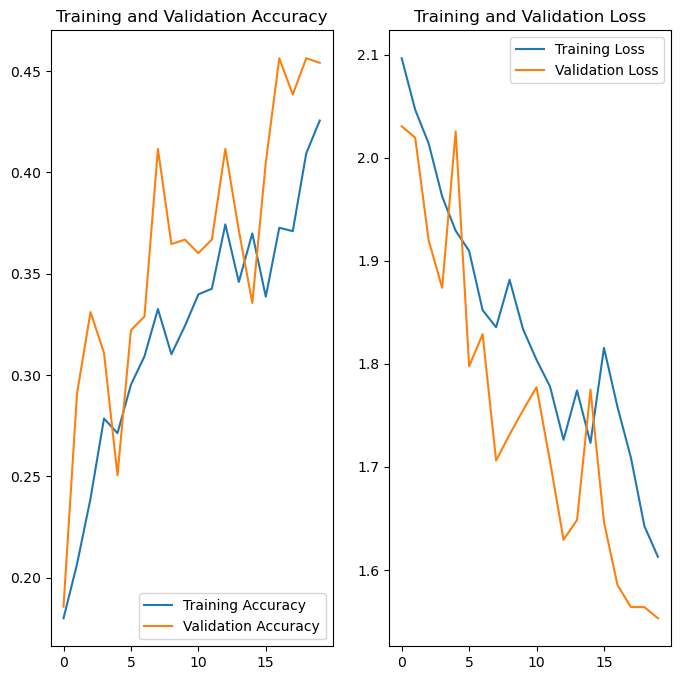

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
- It is observed that the model is performing better when compared to the model without image augmentation and without applying dropout.
- But there is still scope for more improvements

#### Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

#### Find the distribution of classes in the training dataset

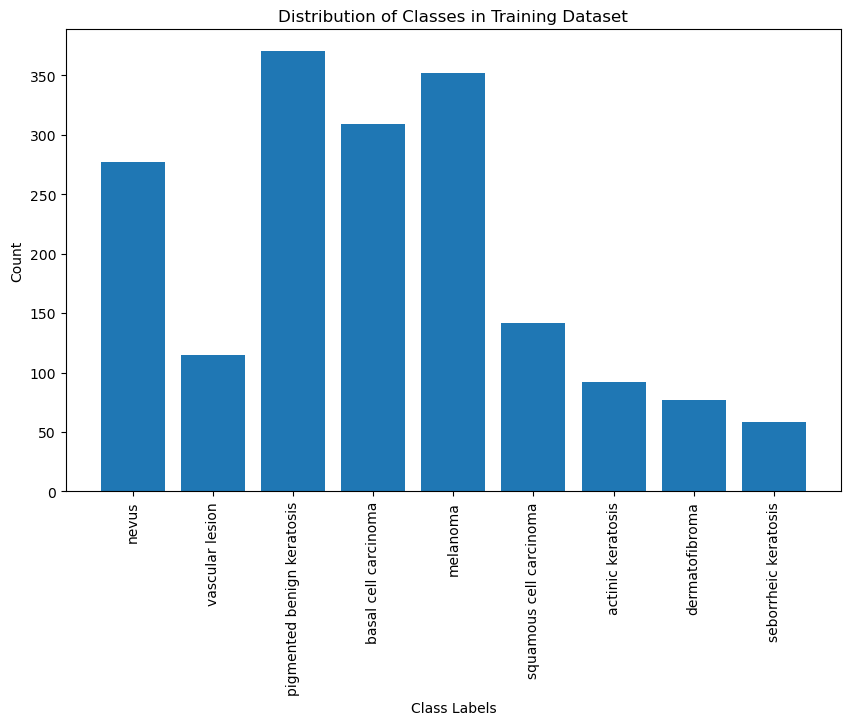

In [32]:
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store class counts
class_counts = {}

# Loop through the training dataset to count the occurrences of each class
for images, labels in train_ds:
    for label in labels.numpy():
        class_label = class_names[label.argmax()]  # Convert one-hot encoding to class label
        if class_label in class_counts:
            class_counts[class_label] += 1
        else:
            class_counts[class_label] = 1

# Extract class labels and counts from the dictionary
class_labels = list(class_counts.keys())
class_count_values = list(class_counts.values())

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_count_values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Dataset')
plt.xticks(rotation=90)
plt.show()

### Observations
- It is observed that the class distribution is not uniform. 'Seborrheic keratosis' has least number of images and 'pigmented benign keratosis' has highest number of images.
- Thus to achieve more accuracy it is needed to apply class imbalance technique.

### Applying Class Imbalance

In [ ]:
path_to_training_dataset="CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

In [42]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [44]:
from glob import glob
import os

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['CNN_assignment\\Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c39f6556-354b-403c-9734-a72de2a646c8.jpg',
 'CNN_assignment\\Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_f7d6a173-eea1-4c79-9db7-7e852ec6763a.jpg',
 'CNN_assignment\\Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_7671d34c-1253-4bc1-91aa-97b142ab739d.jpg',
 'CNN_assignment\\Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_98ecfc8a-83d3-4daf-85bd-08f43caea0d0.jpg',
 'CNN_assignment\\Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_9b6810d6-4387-4a57-866a-2f7bc4635

In [45]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [47]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [48]:
dataframe_dict_new

{'CNN_assignment\\Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c39f6556-354b-403c-9734-a72de2a646c8.jpg': 'actinic keratosis',
 'CNN_assignment\\Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_f7d6a173-eea1-4c79-9db7-7e852ec6763a.jpg': 'actinic keratosis',
 'CNN_assignment\\Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_7671d34c-1253-4bc1-91aa-97b142ab739d.jpg': 'actinic keratosis',
 'CNN_assignment\\Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_98ecfc8a-83d3-4daf-85bd-08f43caea0d0.jpg': 'actinic keratosis',
 'CNN_assignment\\Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration\\Train\\actinic keratosis\\o

In [53]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [59]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

##### So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Todo: Train the model on the data created using Augmentor

In [60]:
batch_size = 32
img_height = 180
img_width = 180

In [64]:
# Create a training dataset
data_dir_train="CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [67]:
# Create a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [68]:
# Create model including normalization
# Create a Sequential model with Dropout layers
model_with_aug = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),  # Add Dropout to the first Dense layer
    layers.Dense(9, activation='softmax')
])

In [74]:
## Compile the model
model_with_aug.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model_with_aug.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization (Batch  (None, 180, 180, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 128)     3584      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 89, 89, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 64)        73792     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 43, 43, 64)       

In [75]:
# Trianing the model
epochs = 20
history = model_with_aug.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 265s 2s/step - loss: 2.0421 - accuracy: 0.2148 - val_loss: 2.0783 - val_accuracy: 0.2079
Epoch 2/20
169/169 [==============================] - 300s 2s/step - loss: 1.8895 - accuracy: 0.3095 - val_loss: 1.7562 - val_accuracy: 0.3742
Epoch 3/20
169/169 [==============================] - 262s 2s/step - loss: 1.7607 - accuracy: 0.3631 - val_loss: 1.4407 - val_accuracy: 0.4937
Epoch 4/20
169/169 [==============================] - 339s 2s/step - loss: 1.6606 - accuracy: 0.3928 - val_loss: 1.4684 - val_accuracy: 0.5130
Epoch 5/20
127/169 [=====================>........] - ETA: 1:15 - loss: 1.5760 - accuracy: 0.4183

KeyboardInterrupt: 